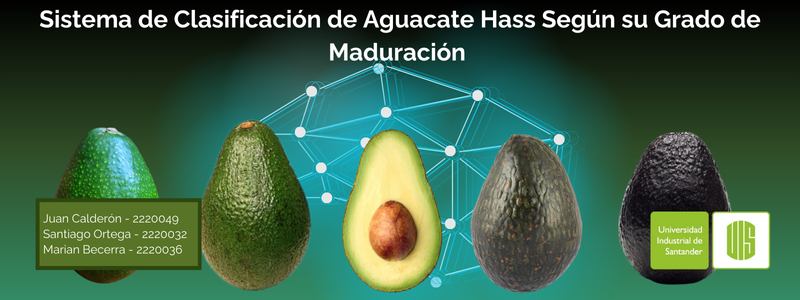

**Autores: Juan Calderón, Santiago Ortega, Marian Becerra**

**Objetivo:**
Desarrollar e implementar un sistema automatizado basado en técnicas de deep learning que clasifique de manera precisa el grado de maduración de aguacates 'Hass' a partir de imágenes.

**Dataset:**
Disponible en el presente enlace: https://data.mendeley.com/datasets/3xd9n945v8/1

**Canva:**
Disponible en el presente enlace: https://www.canva.com/design/DAGlbF8f7No/W7SaxYqUi5SJ2xX8z9eGAw/view?utm_content=DAGlbF8f7No&utm_campaign=designshare&utm_medium=link2&utm_source=uniquelinks&utlId=hd0a5a73249

In [9]:
# @title **DRIVE**

import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive


In [44]:
# @title **LIBRERIAS**

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
np.random.seed(123)

# **DATOS RGB**

In [10]:
# @title **Datos Iniciales**

d = pd.read_excel("/content/drive/MyDrive/Hass Avocado Ripening Photographic Dataset/Hass Avocado Ripening Photographic Dataset/dataset_filtrado.xlsx")
print(d.shape)

d['Storage Group'] = d['Storage Group'].replace({
    'T10': 10,
    'T20': 20,
    'Tam': 24
})

d.head()

(14710, 6)


<ipython-input-10-d07e8a6ed4ff>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Storage Group'] = d['Storage Group'].replace({


,File Name,Time Stamp,Storage Group,Sample,Day of Experiment,Ripening Index Classification
0,T20_d01_001_a_1,2022-04-04 18:56:55,20,1,1,1
1,T20_d01_001_b_1,2022-04-04 18:57:03,20,1,1,1
2,T20_d02_001_a_1,2022-04-05 14:16:21,20,1,2,1
3,T20_d02_001_b_1,2022-04-05 14:16:46,20,1,2,1
4,T20_d03_001_a_2,2022-04-06 15:08:50,20,1,3,2


In [11]:
# @title **Datos RGB**

rgb = pd.read_csv("/content/drive/MyDrive/Hass Avocado Ripening Photographic Dataset/Hass Avocado Ripening Photographic Dataset/RGBDataset.csv")
rgb = rgb.rename(columns={"archivo": "File Name"})
rgb.head()

,R_bin0,R_bin1,R_bin2,R_bin3,R_bin4,R_bin5,R_bin6,R_bin7,G_bin0,G_bin1,...,G_bin7,B_bin0,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,File Name
0,0.000338,0.258553,0.456361,0.100803,0.011078,0.009770,0.163096,0.0,0.012537,0.438201,...,0.0,0.009222,0.416128,0.336168,0.055675,0.008438,0.006498,0.167870,0.0,Tam_d08_039_b_4
1,0.000179,0.231408,0.502210,0.123228,0.023156,0.013182,0.106638,0.0,0.002554,0.397767,...,0.0,0.005596,0.431702,0.348344,0.084894,0.014737,0.004963,0.109763,0.0,Tam_d08_028_b_4
2,0.000592,0.297796,0.401986,0.094806,0.018761,0.014258,0.171801,0.0,0.020394,0.490781,...,0.0,0.008863,0.443737,0.290075,0.062169,0.010759,0.006662,0.177734,0.0,Tam_d08_039_a_4
3,0.003076,0.272576,0.378373,0.165823,0.045012,0.018892,0.116248,0.0,0.007774,0.327444,...,0.0,0.017171,0.358301,0.339944,0.128410,0.031409,0.007064,0.117702,0.0,Tam_d08_019_b_4
4,0.000338,0.221495,0.472315,0.127323,0.019891,0.011163,0.147474,0.0,0.002369,0.315352,...,0.0,0.004938,0.392438,0.354802,0.075792,0.013466,0.006691,0.151874,0.0,Tam_d08_066_a_4


In [12]:
# @title **Concatenacion de datos**
df_merge = pd.merge(d, rgb, on="File Name", how="inner")

cols = df_merge.columns[6:]
x = df_merge[cols].values
y = df_merge.values[:,5]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

df_merge.head()


,File Name,Time Stamp,Storage Group,Sample,Day of Experiment,Ripening Index Classification,R_bin0,R_bin1,R_bin2,R_bin3,...,G_bin6,G_bin7,B_bin0,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7
0,T20_d01_001_a_1,2022-04-04 18:56:55,20,1,1,1,0.0,0.000021,0.093370,0.669650,...,0.007942,0.0,0.000000,0.129163,0.629326,0.195871,0.028740,0.008735,0.008165,0.0
1,T20_d01_001_b_1,2022-04-04 18:57:03,20,1,1,1,0.0,0.001273,0.206426,0.509748,...,0.009477,0.0,0.000000,0.152837,0.538533,0.255973,0.033000,0.009577,0.010080,0.0
2,T20_d02_001_a_1,2022-04-05 14:16:21,20,1,2,1,0.0,0.001081,0.215337,0.596569,...,0.031300,0.0,0.000381,0.174296,0.597051,0.166024,0.022886,0.008000,0.031362,0.0
3,T20_d02_001_b_1,2022-04-05 14:16:46,20,1,2,1,0.0,0.029895,0.322367,0.447309,...,0.056469,0.0,0.001240,0.250922,0.470576,0.182613,0.029642,0.007905,0.057102,0.0
4,T20_d03_001_a_2,2022-04-06 15:08:50,20,1,3,2,0.0,0.002986,0.220709,0.518957,...,0.045800,0.0,0.000434,0.230600,0.530859,0.164464,0.020330,0.006692,0.046621,0.0


In [15]:
# @title **Generar .csv**
output_dir = '/content/drive/MyDrive/Hass Avocado Ripening Photographic Dataset/Hass Avocado Ripening Photographic Dataset'
output_path = os.path.join(output_dir, 'RGB_Avocado.csv')
df_merge.to_csv(output_path, index=False)

# **MODELOS SUPERVISADOS**

## **Validación Cruzada**


In [16]:
# @title **Declaración de Modelos**

modelos = {
    'GaussianNB': (GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7]}),
    'DecisionTree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_split': [1, 2, 5],
        'criterion': ['gini', 'entropy']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [1, 2, 5],
        'max_features': ['sqrt', 'log2']
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    })
}


In [17]:
# @title **Comparación GNB, DT, RF, SVM con GridSearchCV**

for nombre, (modelo, param_grid) in modelos.items():
    print(f"\n🔎 Buscando mejores hiperparámetros para {nombre} con GridSearchCV")

    grid_search = GridSearchCV(
        estimator=modelo,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"🏆 Mejor modelo para {nombre}: {grid_search.best_params_}")
    print(f"✅ Accuracy en test: {acc:.4f}")


🔎 Buscando mejores hiperparámetros para GaussianNB con GridSearchCV
🏆 Mejor modelo para GaussianNB: {'var_smoothing': 1e-07}
✅ Accuracy en test: 0.5046

🔎 Buscando mejores hiperparámetros para DecisionTree con GridSearchCV


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

🏆 Mejor modelo para DecisionTree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
✅ Accuracy en test: 0.6633

🔎 Buscando mejores hiperparámetros para RandomForest con GridSearchCV


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

🏆 Mejor modelo para RandomForest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
✅ Accuracy en test: 0.7197

🔎 Buscando mejores hiperparámetros para SVM con GridSearchCV
🏆 Mejor modelo para SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
✅ Accuracy en test: 0.7072


In [18]:
# @title **Comparación GNB, DT, RF, SVM con RandomizedSearchCV**

for nombre, (modelo, param_dist) in modelos.items():
    print(f"\n🎲 Buscando mejores hiperparámetros para {nombre}...")

    random_search = RandomizedSearchCV(
        estimator=modelo,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0,
        random_state=42
    )

    random_search.fit(x_train, y_train)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"🏆 Mejor modelo para {nombre}: {random_search.best_params_}")
    print(f"✅ Accuracy en test: {acc:.4f}")


🎲 Buscando mejores hiperparámetros para GaussianNB...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🏆 Mejor modelo para GaussianNB: {'var_smoothing': 1e-07}
✅ Accuracy en test: 0.5046

🎲 Buscando mejores hiperparámetros para DecisionTree...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in 

🏆 Mejor modelo para DecisionTree: {'min_samples_split': 5, 'max_depth': 10, 'criterion': 'gini'}
✅ Accuracy en test: 0.6637

🎲 Buscando mejores hiperparámetros para RandomForest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

🏆 Mejor modelo para RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 20}
✅ Accuracy en test: 0.7181

🎲 Buscando mejores hiperparámetros para SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🏆 Mejor modelo para SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
✅ Accuracy en test: 0.7072


## **Modelos de Clasificación: Parámetros por Defecto**

In [19]:
# @title **Gaussian Naive Bayes**

est = GaussianNB()
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.85      0.43      0.57      2464
           2       0.34      0.56      0.42      1562
           3       0.39      0.34      0.36      1933
           4       0.54      0.49      0.51      2312
           5       0.56      0.73      0.63      2026

    accuracy                           0.51     10297
   macro avg       0.53      0.51      0.50     10297
weighted avg       0.56      0.51      0.51     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.42      0.57      1104
           2       0.32      0.57      0.41       666
           3       0.39      0.34      0.37       823
           4       0.54      0.47      0.50       982
           5       0.54      0.71      0.61       838

    accuracy                           0.49      4413
   macro avg       0.53      0.50      0.49      4413
weighted avg       0.56     

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2464
           2       1.00      1.00      1.00      1562
           3       1.00      1.00      1.00      1933
           4       1.00      1.00      1.00      2312
           5       1.00      1.00      1.00      2026

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.80      0.81      0.81      1104
           2       0.50      0.50      0.50       666
           3       0.54      0.53      0.54       823
           4       0.53      0.53      0.53       982
           5       0.61      0.60      0.61       838

    accuracy                           0.61      4413
   macro avg       0.60      0.60      0.60      4413
weighted avg       0.61     

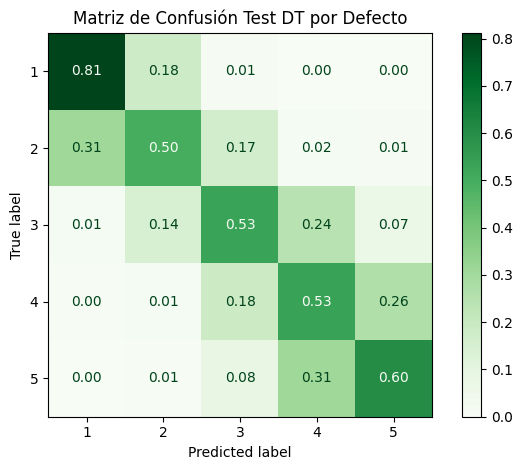

In [20]:
# @title **Decision Tree Classifier**

est = DecisionTreeClassifier()
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

#Matriz
cm = confusion_matrix(y_test, est.predict(x_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test DT por Defecto")
plt.tight_layout()
plt.show()


In [21]:
# @title **Random Forest Classifier**

est = RandomForestClassifier()
est.fit(x_train,y_train)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2464
           2       1.00      1.00      1.00      1562
           3       1.00      1.00      1.00      1933
           4       1.00      1.00      1.00      2312
           5       1.00      1.00      1.00      2026

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88      1104
           2       0.68      0.59      0.63       666
           3       0.66      0.65      0.66       823
           4       0.63      0.65      0.64       982
           5       0.71      0.69      0.70       838

    accuracy                           0.72      4413
   macro avg       0.71      0.70      0.70      4413
weighted avg       0.71     

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.84      0.92      0.88      2464
           2       0.72      0.55      0.62      1562
           3       0.66      0.64      0.65      1933
           4       0.59      0.68      0.63      2312
           5       0.71      0.66      0.68      2026

    accuracy                           0.70     10297
   macro avg       0.70      0.69      0.69     10297
weighted avg       0.71      0.70      0.70     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.84      0.92      0.88      1104
           2       0.69      0.57      0.62       666
           3       0.66      0.60      0.63       823
           4       0.57      0.67      0.62       982
           5       0.69      0.63      0.66       838

    accuracy                           0.70      4413
   macro avg       0.69      0.68      0.68      4413
weighted avg       0.70     

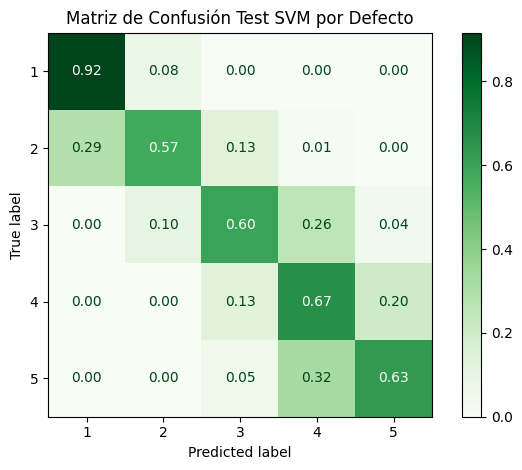

In [22]:
# @title **Support Vector Machine**

est = SVC()
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
##print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

#Matriz
cm = confusion_matrix(y_test, est.predict(x_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test SVM por Defecto")
plt.tight_layout()
plt.show()

## **Modelos de Clasificación: Parámetros arrojados por GridSearchCV**

In [23]:
# @title **Gaussian Naive Bayes**

est = GaussianNB(var_smoothing=1e-07)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.82      0.49      0.61      2464
           2       0.34      0.52      0.41      1562
           3       0.40      0.34      0.37      1933
           4       0.54      0.50      0.52      2312
           5       0.56      0.73      0.64      2026

    accuracy                           0.52     10297
   macro avg       0.53      0.52      0.51     10297
weighted avg       0.55      0.52      0.52     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.82      0.48      0.60      1104
           2       0.32      0.53      0.40       666
           3       0.40      0.34      0.37       823
           4       0.54      0.48      0.51       982
           5       0.54      0.71      0.61       838

    accuracy                           0.50      4413
   macro avg       0.52      0.51      0.50      4413
weighted avg       0.55     

In [24]:
# @title **Decision Tree Classifier**

est = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini')
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      2464
           2       0.88      0.77      0.82      1562
           3       0.80      0.80      0.80      1933
           4       0.73      0.74      0.73      2312
           5       0.75      0.77      0.76      2026

    accuracy                           0.81     10297
   macro avg       0.82      0.81      0.81     10297
weighted avg       0.81      0.81      0.81     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.83      0.86      0.84      1104
           2       0.58      0.52      0.55       666
           3       0.60      0.58      0.59       823
           4       0.57      0.59      0.58       982
           5       0.65      0.67      0.66       838

    accuracy                           0.66      4413
   macro avg       0.65      0.64      0.65      4413
weighted avg       0.66     

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2464
           2       1.00      1.00      1.00      1562
           3       1.00      0.99      1.00      1933
           4       0.99      1.00      0.99      2312
           5       0.99      0.99      0.99      2026

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.91      0.88      1104
           2       0.67      0.57      0.62       666
           3       0.66      0.65      0.66       823
           4       0.64      0.67      0.66       982
           5       0.72      0.70      0.71       838

    accuracy                           0.72      4413
   macro avg       0.71      0.70      0.70      4413
weighted avg       0.72     

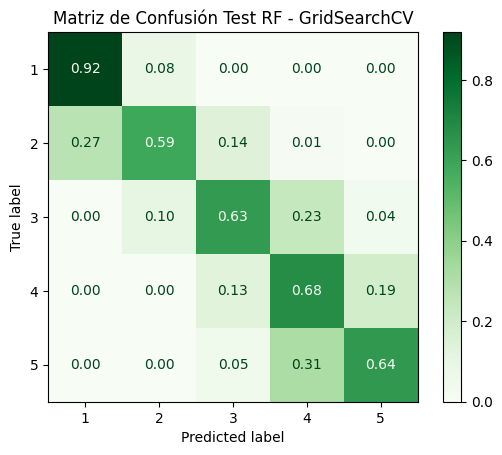

In [25]:
# @title **Random Forest Classifier**

est = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_split=5)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test RF - GridSearchCV")
plt.show()

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.85      0.92      0.89      2464
           2       0.73      0.58      0.65      1562
           3       0.67      0.67      0.67      1933
           4       0.60      0.68      0.64      2312
           5       0.73      0.66      0.69      2026

    accuracy                           0.72     10297
   macro avg       0.72      0.70      0.71     10297
weighted avg       0.72      0.72      0.72     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88      1104
           2       0.70      0.59      0.64       666
           3       0.66      0.63      0.65       823
           4       0.59      0.68      0.63       982
           5       0.71      0.64      0.67       838

    accuracy                           0.71      4413
   macro avg       0.70      0.69      0.69      4413
weighted avg       0.71     

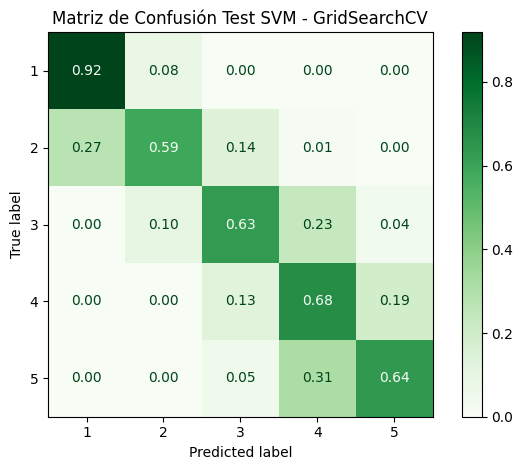

In [26]:
# @title **Support Vector Machine**

est = SVC(C=10, gamma=1, kernel='rbf' )
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

#Matriz
cm = confusion_matrix(y_test, est.predict(x_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test SVM - GridSearchCV")
plt.tight_layout()
plt.show()

## **Modelos de Clasificación: Parámetros arrojados por RandomizedSearchCV**

In [27]:
# @title **Gaussian Naive Bayes**

est = GaussianNB(var_smoothing=1e-07)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.82      0.49      0.61      2464
           2       0.34      0.52      0.41      1562
           3       0.40      0.34      0.37      1933
           4       0.54      0.50      0.52      2312
           5       0.56      0.73      0.64      2026

    accuracy                           0.52     10297
   macro avg       0.53      0.52      0.51     10297
weighted avg       0.55      0.52      0.52     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.82      0.48      0.60      1104
           2       0.32      0.53      0.40       666
           3       0.40      0.34      0.37       823
           4       0.54      0.48      0.51       982
           5       0.54      0.71      0.61       838

    accuracy                           0.50      4413
   macro avg       0.52      0.51      0.50      4413
weighted avg       0.55     

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.89      0.95      0.92      2464
           2       0.84      0.74      0.78      1562
           3       0.78      0.80      0.79      1933
           4       0.73      0.75      0.74      2312
           5       0.79      0.76      0.78      2026

    accuracy                           0.81     10297
   macro avg       0.81      0.80      0.80     10297
weighted avg       0.81      0.81      0.81     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.83      0.87      0.85      1104
           2       0.56      0.52      0.54       666
           3       0.56      0.56      0.56       823
           4       0.55      0.59      0.57       982
           5       0.64      0.58      0.61       838

    accuracy                           0.64      4413
   macro avg       0.63      0.62      0.63      4413
weighted avg       0.64     

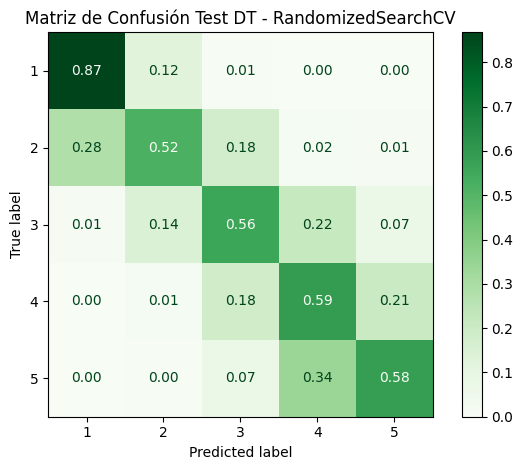

In [28]:
# @title **Decision Tree Classifier**

est = DecisionTreeClassifier(max_depth=10, min_samples_split=2, criterion='entropy')
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

#Matriz
cm = confusion_matrix(y_test, est.predict(x_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test DT - RandomizedSearchCV")
plt.tight_layout()
plt.show()

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2464
           2       1.00      1.00      1.00      1562
           3       1.00      0.99      1.00      1933
           4       0.99      1.00      0.99      2312
           5       1.00      0.99      0.99      2026

    accuracy                           1.00     10297
   macro avg       1.00      1.00      1.00     10297
weighted avg       1.00      1.00      1.00     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.91      0.88      1104
           2       0.67      0.58      0.62       666
           3       0.66      0.65      0.65       823
           4       0.64      0.67      0.65       982
           5       0.72      0.69      0.71       838

    accuracy                           0.72      4413
   macro avg       0.71      0.70      0.70      4413
weighted avg       0.71     

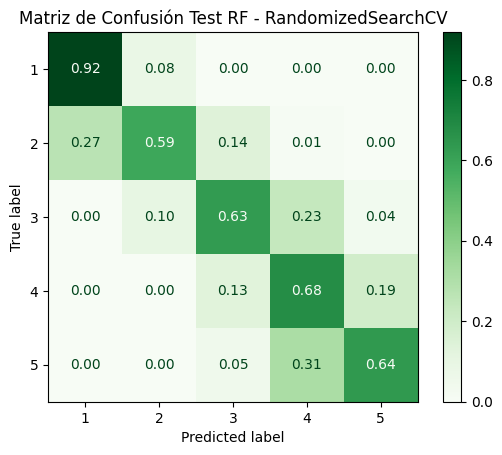

In [29]:
# @title **Random Forest Classifier**

est = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='log2', min_samples_split=5)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test RF - RandomizedSearchCV")
plt.show()


Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.85      0.92      0.89      2464
           2       0.73      0.58      0.65      1562
           3       0.67      0.67      0.67      1933
           4       0.60      0.68      0.64      2312
           5       0.73      0.66      0.69      2026

    accuracy                           0.72     10297
   macro avg       0.72      0.70      0.71     10297
weighted avg       0.72      0.72      0.72     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88      1104
           2       0.70      0.59      0.64       666
           3       0.66      0.63      0.65       823
           4       0.59      0.68      0.63       982
           5       0.71      0.64      0.67       838

    accuracy                           0.71      4413
   macro avg       0.70      0.69      0.69      4413
weighted avg       0.71     

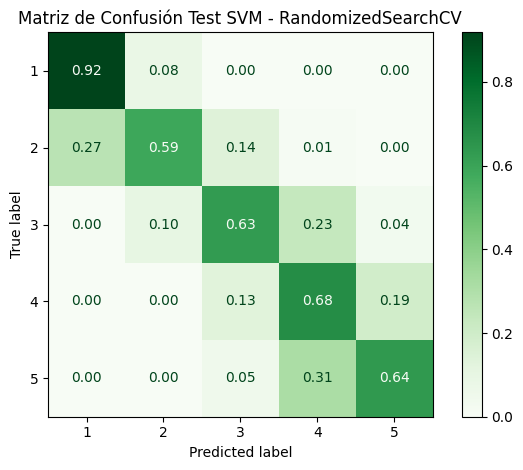

In [30]:
# @title **Support Vector Machine**

est = SVC(C=10, gamma=1, kernel='rbf' )
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

cm = confusion_matrix(y_test, est.predict(x_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test SVM - RandomizedSearchCV")
plt.tight_layout()
plt.show()

## **Caso especial: Random Forest**

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.93      0.97      0.95      2464
           2       0.91      0.81      0.86      1562
           3       0.88      0.89      0.89      1933
           4       0.89      0.91      0.90      2312
           5       0.91      0.91      0.91      2026

    accuracy                           0.91     10297
   macro avg       0.90      0.90      0.90     10297
weighted avg       0.91      0.91      0.90     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.84      0.91      0.87      1104
           2       0.67      0.58      0.62       666
           3       0.65      0.64      0.65       823
           4       0.63      0.66      0.64       982
           5       0.71      0.69      0.70       838

    accuracy                           0.71      4413
   macro avg       0.70      0.69      0.70      4413
weighted avg       0.71     

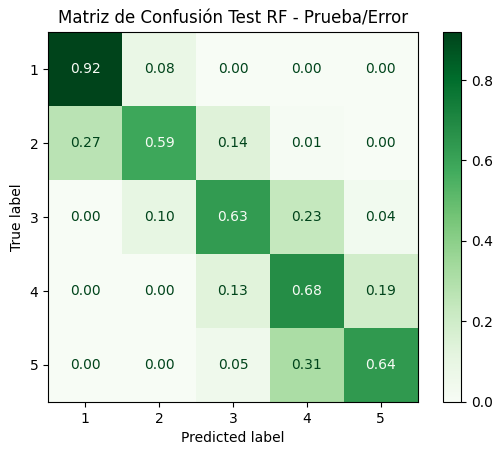

In [31]:
# @title **Random Forest Classifier**

est = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
est.fit(x_train,y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(x_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(x_test)))


#s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Matriz de Confusión Test RF - Prueba/Error")
plt.show()

# **MODELOS NO SUPERVISADOS**

## **Modelos de Reducción**

### **T-SNE**

In [14]:
# @title **Modelo**
tsne_2d = TSNE(n_components=2, perplexity=30, learning_rate=12, early_exaggeration=12, random_state=42)
X_tsne2 = tsne_2d.fit_transform(x)

tsne_3d = TSNE(n_components=3, perplexity=30, learning_rate=12, early_exaggeration=12, random_state=42)
X_tsne3 = tsne_3d.fit_transform(x)

print('X:', x.shape, 'X_tsne_2D:', X_tsne2.shape, 'X_tsne_3D:', X_tsne3.shape)


X: (14710, 24) X_tsne_2D: (14710, 2) X_tsne_3D: (14710, 3)


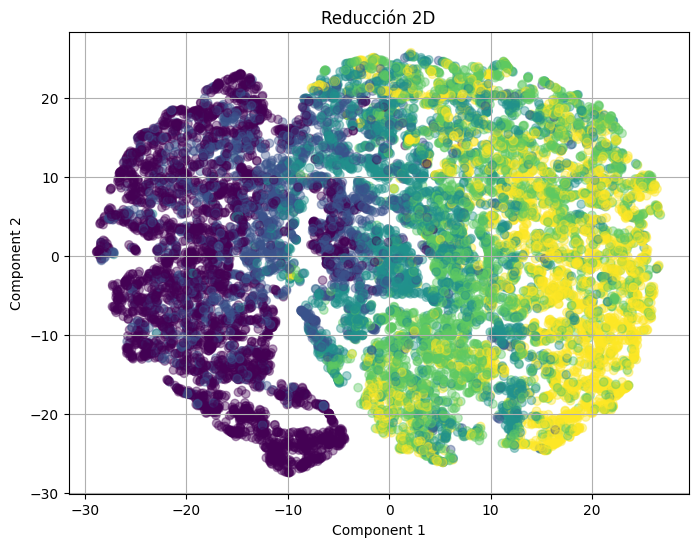

In [15]:
# @title **Gráfica 2D**
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y, alpha=0.4)
plt.title("Reducción 2D")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

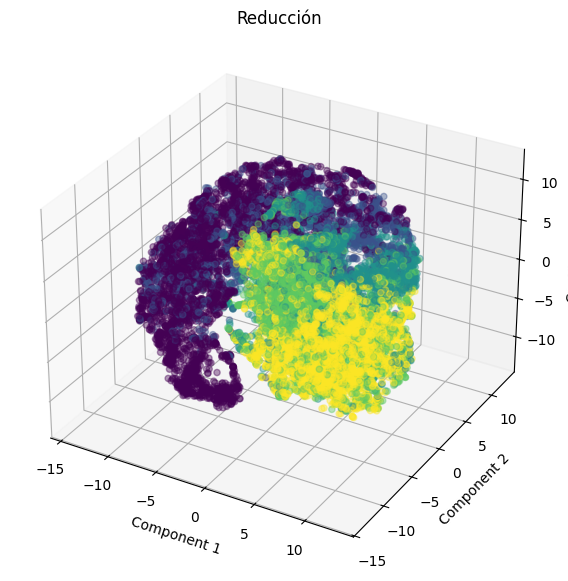

In [16]:
# @title **Gráfica 3D**
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=y, alpha=0.4)
ax.set_title("Reducción")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.show()

### **PCA**

X:  (14710, 24)  X_pca:  (14710, 2)


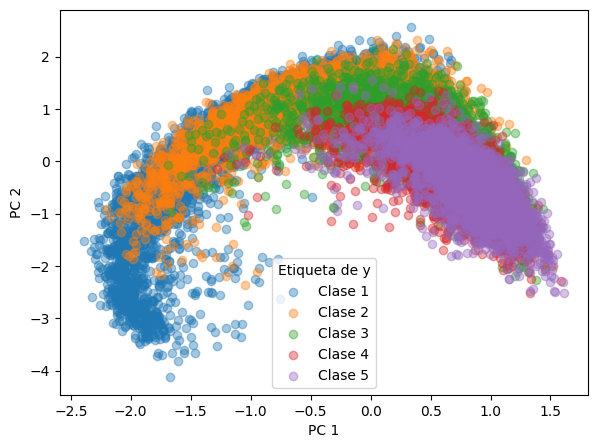

In [17]:
# @title **PCA 2D**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca_avocado = PCA(n_components=2, whiten=True)
X_pca = pca_avocado.fit_transform(x)
print('X: ', x.shape, ' X_pca: ', X_pca.shape)


plt.figure(figsize=(15,5))
plt.subplot(121)


for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], alpha=0.4, label=f'Clase {label}')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Etiqueta de y")

plt.show()

(14710, 3) (14710, 24)


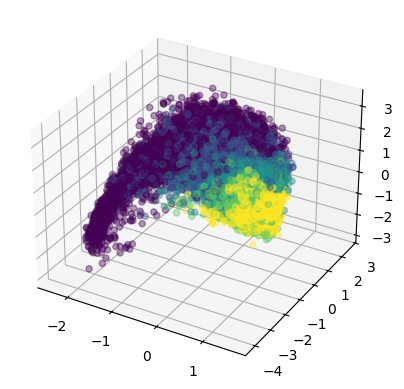

In [18]:
# @title **PCA 3D**

pca_avocado = PCA(n_components= 3, whiten=True)
X_pca = pca_avocado.fit_transform(x)
print(X_pca.shape, x.shape)

ax = plt.axes(projection="3d")
ax.scatter3D(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y, alpha=0.4)

# **Modelos de Reducción - Modelos Supervisados**

### **T-SNE- Modelos de Clasificación**

In [19]:
# @title **Datos**
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_tsne2, y, test_size=0.3, random_state=21)

In [20]:
# @title **T-SNE - Gaussian**

est = GaussianNB(var_smoothing=1e-07)
est.fit(x_train2,y_train2)

print("Reporte de entrenamiento:")
print(classification_report(y_train2, est.predict(x_train2)))
print("Reporte de evaluación:")
print(classification_report(y_test2, est.predict(x_test2)))


Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.73      0.92      0.81      2464
           2       0.55      0.31      0.40      1562
           3       0.45      0.44      0.45      1933
           4       0.51      0.48      0.49      2312
           5       0.59      0.66      0.62      2026

    accuracy                           0.59     10297
   macro avg       0.57      0.56      0.56     10297
weighted avg       0.57      0.59      0.57     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.74      0.91      0.81      1104
           2       0.51      0.33      0.40       666
           3       0.44      0.40      0.42       823
           4       0.52      0.49      0.50       982
           5       0.60      0.66      0.63       838

    accuracy                           0.59      4413
   macro avg       0.56      0.56      0.55      4413
weighted avg       0.57     

In [21]:
# @title **T-SNE - Decision Tree**

est = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini')
est.fit(x_train2,y_train2)

print("Reporte de entrenamiento:")
print(classification_report(y_train2, est.predict(x_train2)))
print("Reporte de evaluación:")
print(classification_report(y_test2, est.predict(x_test2)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.82      0.93      0.88      2464
           2       0.73      0.52      0.61      1562
           3       0.66      0.70      0.68      1933
           4       0.65      0.66      0.65      2312
           5       0.73      0.72      0.72      2026

    accuracy                           0.72     10297
   macro avg       0.72      0.71      0.71     10297
weighted avg       0.72      0.72      0.72     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.79      0.89      0.84      1104
           2       0.57      0.43      0.49       666
           3       0.56      0.59      0.58       823
           4       0.55      0.55      0.55       982
           5       0.64      0.64      0.64       838

    accuracy                           0.64      4413
   macro avg       0.62      0.62      0.62      4413
weighted avg       0.63     

In [23]:
# @title **T-SNE - Random Forest**

est = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
est.fit(x_train2,y_train2)

print("Reporte de entrenamiento:")
print(classification_report(y_train2, est.predict(x_train2)))
print("Reporte de evaluación:")
print(classification_report(y_test2, est.predict(x_test2)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.86      0.96      0.90      2464
           2       0.82      0.62      0.71      1562
           3       0.76      0.76      0.76      1933
           4       0.75      0.78      0.77      2312
           5       0.80      0.80      0.80      2026

    accuracy                           0.80     10297
   macro avg       0.80      0.78      0.79     10297
weighted avg       0.80      0.80      0.80     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.81      0.90      0.85      1104
           2       0.64      0.48      0.55       666
           3       0.60      0.60      0.60       823
           4       0.56      0.58      0.57       982
           5       0.65      0.65      0.65       838

    accuracy                           0.66      4413
   macro avg       0.65      0.64      0.64      4413
weighted avg       0.66     

In [24]:
# @title **T-SNE - Support Vector Machine**
est = SVC(C=10, gamma=1, kernel='rbf')
est.fit(x_train2,y_train2)

print("Reporte de entrenamiento:")
print(classification_report(y_train2, est.predict(x_train2)))
print("Reporte de evaluación:")
print(classification_report(y_test2, est.predict(x_test2)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.86      0.95      0.90      2464
           2       0.79      0.65      0.71      1562
           3       0.75      0.77      0.76      1933
           4       0.74      0.75      0.74      2312
           5       0.79      0.77      0.78      2026

    accuracy                           0.79     10297
   macro avg       0.79      0.78      0.78     10297
weighted avg       0.79      0.79      0.79     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.81      0.87      0.84      1104
           2       0.58      0.49      0.53       666
           3       0.59      0.60      0.59       823
           4       0.56      0.56      0.56       982
           5       0.63      0.61      0.62       838

    accuracy                           0.65      4413
   macro avg       0.63      0.63      0.63      4413
weighted avg       0.64     

### **PCA - Modelos de Clasificación**

In [ ]:
#@title **Código PCA-Modelos clasificación**

In [29]:
# @title **1. GNB**
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)
pca_avocado = PCA(n_components= 7, whiten=True)
pca_avocado.fit(X_train)
X_pca_train = pca_avocado.transform(X_train)
X_pca_test = pca_avocado.transform(X_test)

est = GaussianNB(); est.fit(X_pca_train, y_train)
y_est = est.predict(X_pca_test)
print('X_test', X_pca_test.shape)
print(accuracy_score(y_test, y_est))

X_test (4413, 7)
0.6378880580104237


In [30]:
print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(X_pca_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(X_pca_test)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.83      0.85      0.84      2469
           2       0.58      0.53      0.56      1532
           3       0.55      0.45      0.49      1930
           4       0.54      0.66      0.59      2305
           5       0.62      0.61      0.62      2061

    accuracy                           0.64     10297
   macro avg       0.63      0.62      0.62     10297
weighted avg       0.64      0.64      0.63     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.86      0.85      1099
           2       0.60      0.56      0.58       696
           3       0.54      0.42      0.47       826
           4       0.54      0.64      0.59       989
           5       0.60      0.63      0.61       803

    accuracy                           0.64      4413
   macro avg       0.63      0.62      0.62      4413
weighted avg       0.64     

In [31]:
# @title **2. Decision Tree Classifier**

est = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='gini')
est.fit(X_pca_train, y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(X_pca_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(X_pca_test)))


s = cross_val_score(est, x, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.89      0.95      0.92      2469
           2       0.82      0.70      0.75      1532
           3       0.74      0.73      0.73      1930
           4       0.68      0.67      0.68      2305
           5       0.71      0.76      0.73      2061

    accuracy                           0.77     10297
   macro avg       0.77      0.76      0.76     10297
weighted avg       0.77      0.77      0.77     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.89      0.87      1099
           2       0.63      0.56      0.59       696
           3       0.60      0.58      0.59       826
           4       0.57      0.56      0.56       989
           5       0.60      0.67      0.63       803

    accuracy                           0.66      4413
   macro avg       0.65      0.65      0.65      4413
weighted avg       0.66     

In [32]:
# @title **3. Random Forest Classifier**

est = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_split=5)
est.fit(X_pca_train, y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(X_pca_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(X_pca_test)))


Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2469
           2       0.99      0.98      0.99      1532
           3       0.99      0.98      0.99      1930
           4       0.98      0.99      0.99      2305
           5       0.99      0.99      0.99      2061

    accuracy                           0.99     10297
   macro avg       0.99      0.99      0.99     10297
weighted avg       0.99      0.99      0.99     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.86      0.91      0.88      1099
           2       0.69      0.59      0.64       696
           3       0.63      0.63      0.63       826
           4       0.62      0.63      0.63       989
           5       0.68      0.69      0.68       803

    accuracy                           0.71      4413
   macro avg       0.70      0.69      0.69      4413
weighted avg       0.70     

In [33]:
# @title **4. Support Vector Machine**

est = SVC(C=10, gamma=1, kernel='rbf' )
est.fit(X_pca_train, y_train)

print("Reporte de entrenamiento:")
print(classification_report(y_train, est.predict(X_pca_train)))
print("Reporte de evaluación:")
print(classification_report(y_test, est.predict(X_pca_test)))

Reporte de entrenamiento:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96      2469
           2       0.94      0.85      0.89      1532
           3       0.87      0.86      0.86      1930
           4       0.77      0.81      0.79      2305
           5       0.83      0.81      0.82      2061

    accuracy                           0.87     10297
   macro avg       0.87      0.86      0.87     10297
weighted avg       0.87      0.87      0.87     10297

Reporte de evaluación:
              precision    recall  f1-score   support

           1       0.85      0.86      0.86      1099
           2       0.62      0.58      0.60       696
           3       0.60      0.60      0.60       826
           4       0.60      0.61      0.61       989
           5       0.70      0.70      0.70       803

    accuracy                           0.68      4413
   macro avg       0.67      0.67      0.67      4413
weighted avg       0.68     

### **PCA - Modelos de Regresión**

In [ ]:
#@title **Código PCA-Modelos Regresión**

In [36]:
#@title **DT regressor**
  res = DecisionTreeRegressor(max_depth=2)
  res.fit(X_pca_train,y_train)
  print("R2",r2_score(res.predict(X_pca_test),y_test))
  print("RMSE",root_mean_squared_error(res.predict(X_pca_test),y_test))


R2 0.5313253314131452
RMSE 0.8298773080818445


In [39]:
  #@title **RD Regressor**
  resRFR = RandomForestRegressor(n_estimators=200)
  resRFR.fit(X_pca_train,y_train)
  print("R2 RFR",r2_score(resRFR.predict(X_pca_test),y_test))
  print("RMSE RFR",root_mean_squared_error(resRFR.predict(X_pca_test),y_test))


R2 RFR 0.8490808533888463
RMSE RFR 0.5243691946952485


In [38]:
  #@title **SVR**
  resSVR = SVR(kernel="rbf")
  resSVR.fit(X_pca_train,y_train)
  print("R2 SVR",r2_score(resSVR.predict(X_pca_test),y_test))
  print("RMSE SVR",root_mean_squared_error(resSVR.predict(X_pca_test),y_test))

R2 SVR 0.8629453885815422
RMSE SVR 0.5170282735228879


In [ ]:
#@title **Código PCA-Agrupación**

<ipython-input-47-218dbf335958>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');


Text(0.5, 1.0, 'PCA Kmeans')

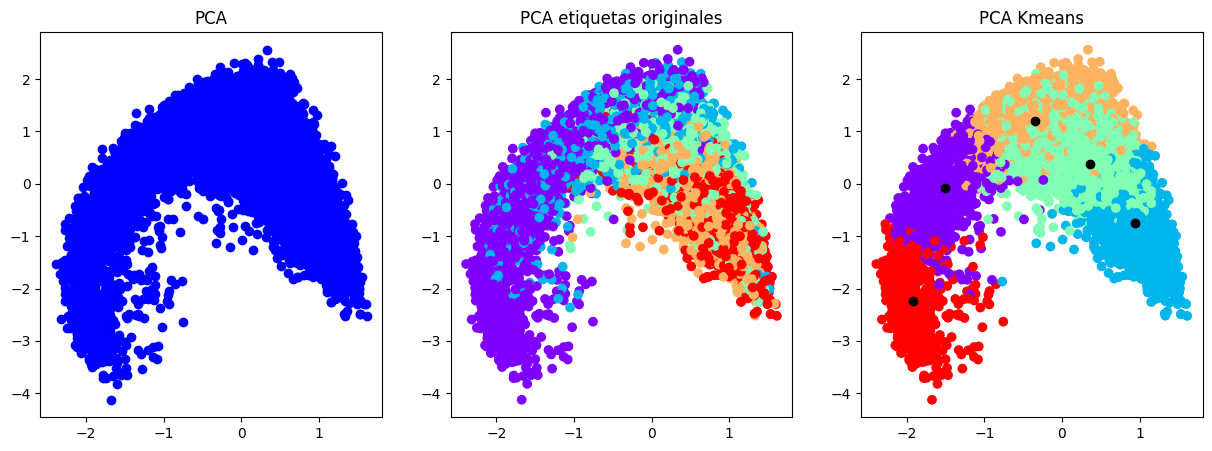

In [47]:
# @title **KMEANS**


kmeans = KMeans(n_clusters=K_value)
kmeans.fit(X_pca)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');
plt.title('PCA')
plt.subplot(132)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow');
plt.title('PCA etiquetas originales')
plt.subplot(133)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='rainbow');
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('PCA Kmeans')

<ipython-input-48-ce73f80d0c1d>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');


Text(0.5, 1.0, 'PCA DBSCAN')

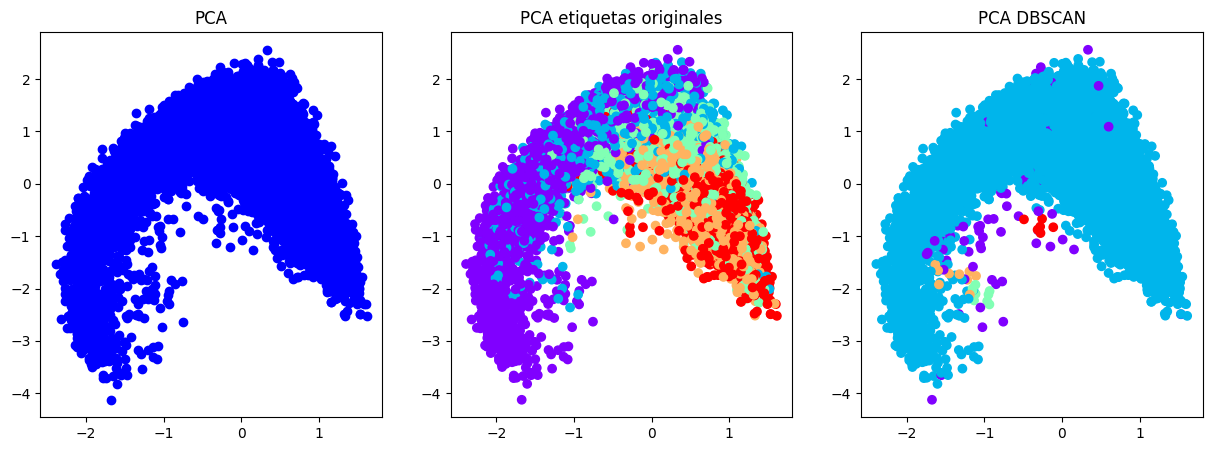

In [48]:
# @title **DBSCAN**

DBS = DBSCAN(eps=.3)
DBS.fit(X_pca)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');
plt.title('PCA')
plt.subplot(132)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow');
plt.title('PCA etiquetas originales')
plt.subplot(133)
plt.scatter(X_pca[:,0], X_pca[:,1], c=DBS.labels_, cmap='rainbow');
plt.title('PCA DBSCAN')

<ipython-input-49-5b69ccc150e2>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');


Text(0.5, 1.0, 'Dendogram Agglomerative Clustering')

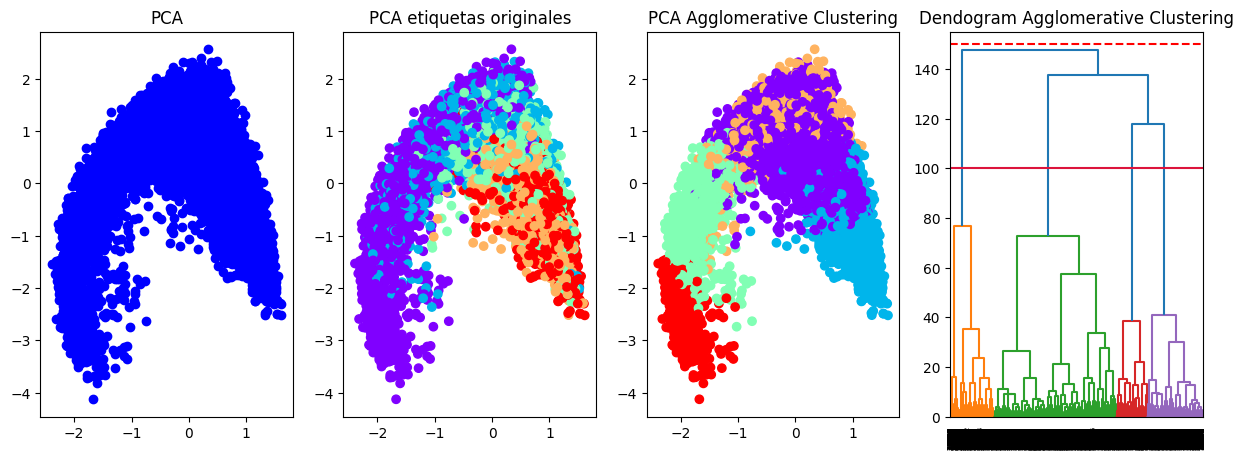

In [49]:
# @title **Agglomerative Clustering**

clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(X_pca)
clusters = hierarchy.linkage(X_pca, method="ward") # to obtain a visual representation
labels = clustering_model.labels_
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');
plt.title('PCA')
plt.subplot(142)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow');
plt.title('PCA etiquetas originales')
plt.subplot(143)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='rainbow');
plt.title('PCA Agglomerative Clustering')
plt.subplot(144)
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(150, color='red', linestyle='--');
plt.axhline(100, color='crimson');
plt.title('Dendogram Agglomerative Clustering')